Depth = 1
0.9366197183098592
0.9130434782608696


Depth = 2
0.9452054794520547
0.9452054794520549


Depth = 3
0.9826388888888888
0.9583333333333334


Depth = 4
0.9965156794425087
0.9577464788732394


Depth = 5
0.9965156794425087
0.9577464788732394


Depth = 6
0.9982547993019197
0.951048951048951


Depth = 7
1.0
0.9577464788732394


Depth = 8
1.0
0.9577464788732394


Depth = 9
1.0
0.9577464788732394


[0.9366197183098592, 0.9452054794520547, 0.9826388888888888, 0.9965156794425087, 0.9965156794425087, 0.9982547993019197, 1.0, 1.0, 1.0]
[0.9130434782608696, 0.9452054794520549, 0.9583333333333334, 0.9577464788732394, 0.9577464788732394, 0.951048951048951, 0.9577464788732394, 0.9577464788732394, 0.9577464788732394]
[3, 0.9826388888888888, 0.9583333333333334, 0.978021978021978, 0.9473684210526315]
dtc.dot


ModuleNotFoundError: No module named 'graphviz'

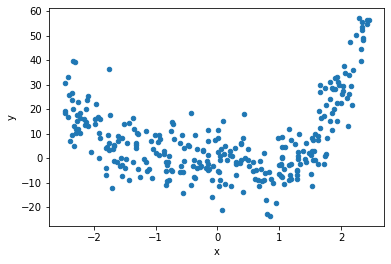

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:




# comment plotting because it causes slow execution !!! 

# we import dataset breast_cancer

from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
#print(data_breast_cancer['DESCR'])


X1 = data_breast_cancer["data"]
y1 = data_breast_cancer["target"]





# we create second dataset   (df) 

import numpy as np
import pandas as pd
size = 300
X2 = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y2 = w4*(X2**4) + w3*(X2**3) + w2*(X2**2) + w1*X2 + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X2, 'y': y2})
df.plot.scatter(x='x',y='y')


# In[2]:



# we dvide breast_cancer dataset on learning and testings sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.20, random_state=42)



# In[3]:




# we are finding the best depth of decision tree in order to maximize f1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# we check for training set and test set


# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracyTrain = []
accuracyTest = []




for depth in max_depth_range:
    
    dtc = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dtc.fit(X_train1, y_train1)
    
    y_predictions = dtc.predict(X_train1)
    
    acc1 = f1_score(y_train1,y_predictions)
    
    accuracyTrain.append(acc1)
    
    
   
    
    y_predictions2 = dtc.predict(X_test1)
    
    acc2 = f1_score(y_test1,y_predictions2)
    
    accuracyTest.append(acc2)

    print("Depth = " + str(depth))
    print(acc1)
    print(acc2)
    print("\n")
    
    

print(accuracyTrain) # depth 8 is optimal, because later we have the same resuslts
print(accuracyTest)

foundedDepth = 3




# In[4]:


# we prepare data to pickle

from sklearn.metrics import accuracy_score


dtc = DecisionTreeClassifier(max_depth = foundedDepth, 
                             random_state = 42)
dtc.fit(X_train1, y_train1)
    
y_predictions = dtc.predict(X_train1)
    
f1Train = f1_score(y_train1,y_predictions)
accTrain = accuracy_score(y_train1, y_predictions)

y_predictions2 = dtc.predict(X_test1)
f1Test = f1_score(y_test1,y_predictions2)
accTest = accuracy_score(y_test1, y_predictions2)


listToPickle = [foundedDepth,f1Train,f1Test,accTrain,accTest]

print(listToPickle)


# In[7]:


# pickling

import pickle

pickle_out = open("f1acc_tree.pkl","wb")
pickle.dump(listToPickle, pickle_out)
pickle_out.close()


# In[6]:




# we want to display the tree

from sklearn.tree import export_graphviz

f = "dtc.dot"

export_graphviz(dtc,out_file=f,rounded=True,filled=True) 
print(f)
#dtc.dot

import graphviz

graph = graphviz.Source.from_file(f)
graph
str_dot = export_graphviz(dtc,rounded=True,filled=True)

graph = graphviz.Source(str_dot)
graph

from subprocess import check_call
check_call(['dot','-Tpng','dtc.dot','-o','bc.png'])















# In[9]:


# we split our second dataset to train set and test set

from sklearn.model_selection import train_test_split



X_train2, X_test2, y_train2, y_test2 = train_test_split(df[["x"]],df[["y"]], test_size=0.20, random_state=42)




# In[10]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# List of values to try for max_depth:
max_depth_range2 = list(range(1, 15))
# List to store the accuracy for each value of max_depth:
accuracyTrain2 = []
accuracyTest2 = []




for depth in max_depth_range2:
    
    dtr = DecisionTreeRegressor(max_depth=depth,random_state=42)
    dtr.fit(X_train2, y_train2)
    
    y_predictions = dtr.predict(X_train2)
    
    acc1 = mean_squared_error(y_train2, y_predictions)
    
    accuracyTrain2.append(acc1)
    
    
    y_predictions2 = dtr.predict(X_test2)
    
        
    acc2 = mean_squared_error(y_test2, y_predictions2)
    
    accuracyTest2.append(acc2)

    print("Depth = " + str(depth))
    print(acc1)
    print(acc2)
    print("\n")
    
    

print(accuracyTrain2) # depth 8 is optimal, because later we have the same resuslts
print(accuracyTest2)

foundedDepthDTR = 5


# In[11]:


dtr = DecisionTreeRegressor(max_depth=foundedDepthDTR,random_state=42)
dtr.fit(X_train2, y_train2)

y_predictionsDTR = dtr.predict(X_test2)
    
y_predictionsDTRtrain = dtr.predict(X_train2)
    
mseDTRtest = mean_squared_error(y_test2, y_predictionsDTR)
mseDTRtrain = mean_squared_error(y_train2, y_predictionsDTRtrain)


toPickle = [foundedDepthDTR,mseDTRtrain,mseDTRtest]
print(toPickle)


# In[ ]:


# we plot the dataset and predictions of regressor

#import matplotlib.pyplot as plt


#plt.scatter(X_test2, y_test2)
#plt.scatter(X_test2,y_predictionsDTR)
#plt.show()


# In[12]:




# we want to display the tree

from sklearn.tree import export_graphviz

f2 = "dtc2.dot"

export_graphviz(dtr,out_file=f2,rounded=True,filled=True) 
print(f2)

#dtc.dot

import graphviz

graph = graphviz.Source.from_file(f2)
graph
str_dot = export_graphviz(dtr,rounded=True,filled=True)

graph = graphviz.Source(str_dot)
graph

from subprocess import check_call
check_call(['dot','-Tpng','dtc2.dot','-o','reg.png'])


# In[13]:


# we pickle 

import pickle

pickle_out2 = open("mse_tree.pkl","wb")
pickle.dump(toPickle, pickle_out2)
pickle_out2.close()
 


# In[14]:


# test unpikcling

pickle_in = open("f1acc_tree.pkl","rb")
list1 = pickle.load(pickle_in)
print(list1)


pickle_in2 = open("mse_tree.pkl","rb")
list2 = pickle.load(pickle_in2)
print(list2)


# In[ ]:






